In [4]:
# Add Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Create Dataset
df = pd.DataFrame({
    "customer_id": [1, 2, 1, 3, 2, 4, 5, 1, 3],
    "customer_name": ["Aya", "Omar", "Aya", "Lina", "Omar", "Samer", None, "Aya", "Lina"],
    "product": ["lipstick", "eyeliner", "foundation", "lipstick", "perfume",
                "foundation", "perfume", "eyeliner", "lipstick"],
    "price": [10, 7, 25, 10, 40, 25, None, 7, 10],
    "quantity": [2, 1, 1, None, 1, 2, 1, 3, None],
    "category": ["makeup", "makeup", "makeup", "makeup", "fragrance",
                 "makeup", "fragrance", "makeup", "makeup"]
})

print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
customer_id      0
customer_name    1
product          0
price            1
quantity         2
category         0
dtype: int64


In [6]:
# Inspect Data
print(df.head())
print(df.info())
print(df.describe())

# Clean Missing Data
df['quantity'] = df['quantity'].fillna(0)
df['price'] = df['price'].fillna(df['price'].mean())
df['customer_name'] = df['customer_name'].fillna('Unknown')

print("\nMissing values after cleaning:")
print(df.isnull().sum())

   customer_id customer_name     product  price  quantity   category
0            1           Aya    lipstick   10.0       2.0     makeup
1            2          Omar    eyeliner    7.0       1.0     makeup
2            1           Aya  foundation   25.0       1.0     makeup
3            3          Lina    lipstick   10.0       NaN     makeup
4            2          Omar     perfume   40.0       1.0  fragrance
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    9 non-null      int64  
 1   customer_name  8 non-null      object 
 2   product        9 non-null      object 
 3   price          8 non-null      float64
 4   quantity       7 non-null      float64
 5   category       9 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 564.0+ bytes
None
       customer_id      price  quantity
count     9.000000   8

In [7]:
# Create New Metrics

#Total spent per purchase
df['total_spent'] = df['price'] * df['quantity']
print(df['total_spent'])

#Purchase frequency per customer
print(df.groupby('customer_name')['product'].count())

#Total money spent per customer
print(df.groupby('customer_name')['total_spent'].sum())

0    20.00
1     7.00
2    25.00
3     0.00
4    40.00
5    50.00
6    16.75
7    21.00
8     0.00
Name: total_spent, dtype: float64
customer_name
Aya        3
Lina       2
Omar       2
Samer      1
Unknown    1
Name: product, dtype: int64
customer_name
Aya        66.00
Lina        0.00
Omar       47.00
Samer      50.00
Unknown    16.75
Name: total_spent, dtype: float64


In [8]:
# Customer Segmentation

#Identify High-Value Customers (Top Spenders)
top_customers = df.groupby('customer_name')['total_spent'].sum().sort_values(ascending=False).head(3)
print(top_customers)

#Identify Frequent Customers
frequent_customers = df.groupby('customer_name')['product'].count().sort_values(ascending=False)
print(frequent_customers)

customer_name
Aya      66.0
Samer    50.0
Omar     47.0
Name: total_spent, dtype: float64
customer_name
Aya        3
Lina       2
Omar       2
Samer      1
Unknown    1
Name: product, dtype: int64


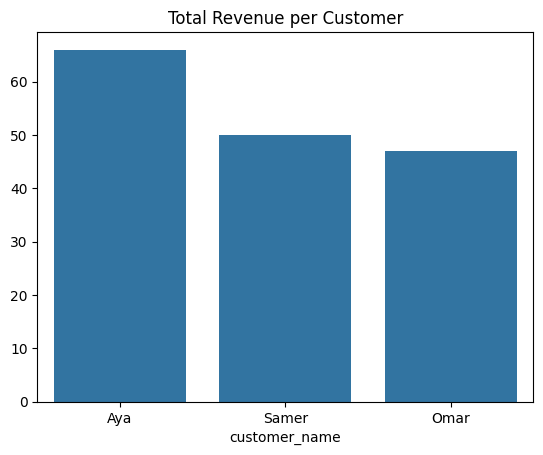

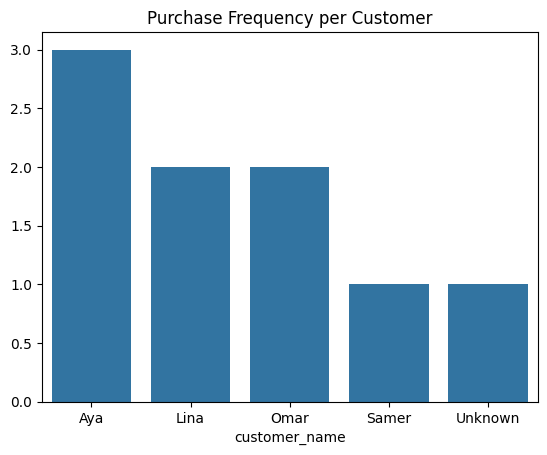

In [9]:
# Visualizations

#Revenue Per Customer
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Total Revenue per Customer")
plt.show()

#Purchase Frequency
sns.barplot(x=frequent_customers.index, y=frequent_customers.values)
plt.title("Purchase Frequency per Customer")
plt.show()



In [10]:
# Export Clean Dataset
df.to_csv("cleaned_customer_data.csv", index=False)
